In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import accuracy_score, f1_score

X = pd.read_csv('CATSnDOGS.csv')
y = pd.read_csv('Labels.csv')

X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)


In [ ]:
def add_noise(X,y,noise_lvl,n_images,n_pixels,pic = False):
    nose_lvl = [1-noise_lvl, noise_lvl+1]
    n_images = int(n_images*len(y))
    images = random.sample(range(0, len(y)), n_images)
    X_noise = np.copy(X)
    if pic == True:
        images = [10,11]
    for i in range(len(images)):
        pixels = random.sample(range(0,X.shape[1]),int(n_pixels))
        for j in range(int(n_pixels)):
            r = random.choice(nose_lvl)
            X_noise[images[i],pixels[j]] = X_noise[images[i],pixels[j]]*r

    X_noise[X_noise > 256] = 256
    X_noise[X_noise < 0] = 0
    return X_noise, images

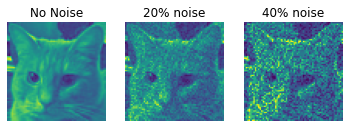

In [ ]:
pic_num = images_1[1]

pic = X_noise_1[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)
pic2 = X_array[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)
pic3 = X_noise_2[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)
plt.figure(figsize=(6,2))
plt.subplot(131)
plt.axis('off')
plt.title('No Noise')
plt.imshow(pic2)
plt.subplot(132)
plt.axis('off')
plt.title('20% noise')
plt.imshow(pic)
plt.subplot(133)
plt.axis('off')
plt.title('40% noise')
plt.imshow(pic3)


In [ ]:
bild = 1

n_pixels = X.shape[1]*0.5
noise_lvl = 0.2
n_images = 0.2
X_noise_1, images_1 = add_noise(X_array,y_array,noise_lvl,n_images,n_pixels,bild)

n_pixels = X.shape[1]*0.5
noise_lvl = 0.4
n_images = 0.2

X_noise_2, images_2 = add_noise(X_array,y_array,noise_lvl,n_images,n_pixels,bild)

def split_data(X,y,trainsize = 0.8):
    
    M = np.c_[np.linspace(0, y.shape[0]-1, num=y.shape[0]),y,X]
    np.random.shuffle(M)
    index = M[:,0]
    y = M[:,1]
    X = M[:,2:]

    X_train = X[:int(len(X_array)*trainsize),:]
    X_test = X[int(len(X_array)*trainsize):,:]
    y_train = y[:int(len(X_array)*trainsize)]
    y_test = y[int(len(X_array)*trainsize):]
    index_train = index[:int(len(X_array)*trainsize)]
    index_test = index[int(len(X_array)*trainsize):]

    return X_train,X_test,y_train,y_test,index_train,index_test

def classify(X,y,times = 500):
    acc = []
    f1 = []
    test_score = []
    mislabeled = np.zeros(y.shape[0])
    for i in range(times):
        X_train,X_test,y_train,y_test,index_train,index_test = split_data(X,y)
        
        knn = KNN()
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        test_score.append(knn.score(X_train,y_train))
        acc.append(accuracy_score(pred,y_test))
        f1.append(f1_score(pred,y_test))
        for i in range(len(pred)):
            if y_test[i] != pred[i]:
                mislabeled[int(index_test[i])] += 1
    mean_acc = np.mean(acc)
    mean_f1 = np.mean(f1)
    mean_test_score = np.mean(test_score)
    #########################################################
    
    return mean_acc,mean_f1,mean_test_score,mislabeled
    

In [ ]:
bild = 0

mean_acc,mean_f1,mean_test_score,mislabeled = classify(X_array,y_array,times = 50)
print(mean_acc)
print(mean_f1)

n_pixels = X.shape[1]*0.5
noise_lvl = 0.2
n_images = 0.2
X_noise_1, images_1 = add_noise(X_array,y_array,noise_lvl,n_images,n_pixels,pic = bild)
mean_acc,mean_f1,mean_test_score,mislabeled = classify(X_noise_1,y_array,times = 50)

print(mean_acc)
print(mean_f1)

n_pixels = X.shape[1]*0.5
noise_lvl = 0.4
n_images = 0.2
X_noise_2, images_2 = add_noise(X_array,y_array,noise_lvl,n_images,n_pixels, pic = bild)
mean_acc,mean_f1,mean_test_score,mislabeled = classify(X_noise_2,y_array,times = 50)

print(mean_acc)
print(mean_f1)

0.7090000000000001
0.7199966156304162
0.6995000000000001
0.7016105503794585
0.7204999999999999
0.7128373482506286


In [ ]:
n_pixels = X.shape[1]*0.5
noise_lvl = 0.2
n_images = 0.6
X_noise_1, images_1 = add_noise(X_array,y_array,noise_lvl,n_images,n_pixels,pic = bild)
mean_acc,mean_f1,mean_test_score,mislabeled = classify(X_noise_1,y_array,times = 50)

N1 = mislabeled[images_1]
notN1 = mislabeled[~np.isin(np.linspace(0,197,198),images_1)]
mis = N1[N1 != 0]*1
mis2 = notN1[notN1 != 0]*1
allmiss = mis.sum()+mis2.sum()
print(mis.sum()/allmiss)

n_pixels = X.shape[1]*0.5
noise_lvl = 0.4
n_images = 0.6
X_noise_2, images_2 = add_noise(X_array,y_array,noise_lvl,n_images,n_pixels, pic = bild)
mean_acc,mean_f1,mean_test_score,mislabeled = classify(X_noise_2,y_array,times = 50)

N1 = mislabeled[images_2]
notN1 = mislabeled[~np.isin(np.linspace(0,197,198),images_2)]
mis = N1[N1 != 0]*1
mis2 = notN1[notN1 != 0]*1

allmiss = mis.sum()+mis2.sum()
print(mis.sum()/allmiss)


0.5717299578059072
0.546


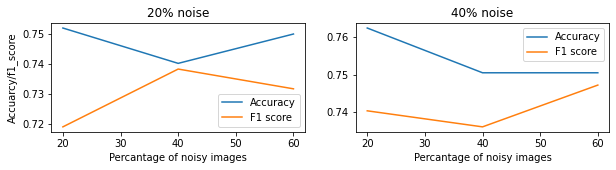

In [ ]:
acc_1 = [0.752,0.7402,0.75]
f1_1 = [0.719,0.7383,0.7317]
acc_2 = [0.7625,0.7505,0.7505]
f1_2 = [0.7403,0.736,0.7472]
plt.figure(figsize=(10,2))
plt.subplot(121)
plt.title("20% noise")
plt.xlabel("Percantage of noisy images")
plt.ylabel("Accuarcy/f1_score")
plt.plot([20,40,60],acc_1,label="Accuracy")
plt.plot([20,40,60],f1_1,label="F1 score")
plt.legend()
plt.subplot(122)
plt.title("40% noise")
plt.xlabel("Percantage of noisy images")
plt.plot([20,40,60],acc_2,label="Accuracy")
plt.plot([20,40,60],f1_2,label="F1 score")
plt.legend()

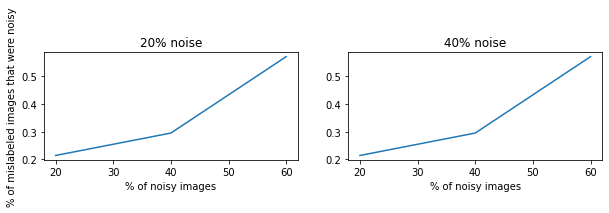

In [ ]:
mis1 = [0.214,0.295,0.571]
mis2 = [0.2034,0.435,0.546]

plt.figure(figsize=(10,2))
plt.subplot(121)
plt.title("20% noise")
plt.xlabel("% of noisy images")
plt.ylabel("% of mislabeled images that were noisy")
plt.plot([20,40,60],mis1)
plt.subplot(122)
plt.title("40% noise")
plt.xlabel("% of noisy images")
plt.plot([20,40,60],mis1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98914b02-c3e6-4d22-a781-75e1a0c3af40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>